# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
df_select = df[["trans_date_trans_time","category","amt","city_pop","is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

<ipython-input-6-cc049218d6ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
<ipython-input-6-cc049218d6ca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [7]:
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [5]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [9]:
from imblearn.over_sampling import RandomOverSampler

In [18]:
ros = RandomOverSampler(random_state = 0)
ros.fit(X, y)
over_x, over_y = ros.fit_resample(X, y)

In [10]:
from imblearn.under_sampling import RandomUnderSampler

In [17]:
rus = RandomUnderSampler(random_state = 0)
rus.fit(X, y)
under_x, under_y = rus.fit_resample(X, y)

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
oversample = SMOTE()

In [19]:
smote_x, smote_y = oversample.fit_resample(X, y)

# 3.) Train three logistic regression models 

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log_reg1 = LogisticRegression().fit(over_x, over_y)

In [22]:
log_reg2 = LogisticRegression().fit(under_x, under_y)

In [23]:
log_reg3 = LogisticRegression().fit(smote_x, smote_y)

# 4.) Test the three models

In [27]:
ros1 = log_reg1.predict(x_test)

In [28]:
rus1 = log_reg2.predict(x_test)

In [29]:
smote1 = log_reg3.predict(x_test)

# 5.) Which performed best in Out of Sample metrics?

In [38]:
from sklearn import metrics

In [44]:
ros_cm = metrics.confusion_matrix(y_test, ros1)

print(ros_cm)
TPR = ros_cm[0,0]/(ros_cm[0,0] + ros_cm[0,1])
TNR = ros_cm[1,1]/(ros_cm[1,1] + ros_cm[1,0])
print("TPR is:{} and TNR is:{}".format(TPR, TNR))

[[134633  31413]
 [   523    147]]
TPR is:0.8108174843115763 and TNR is:0.21940298507462686


In [45]:
rus_cm = metrics.confusion_matrix(y_test, rus1)

print(rus_cm)
TPR = rus_cm[0,0]/(ros_cm[0,0] + rus_cm[0,1])
TNR = rus_cm[1,1]/(ros_cm[1,1] + rus_cm[1,0])
print("TPR is:{} and TNR is:{}".format(TPR, TNR))

[[135037  31009]
 [   524    146]]
TPR is:0.8152340589946994 and TNR is:0.21758569299552907


In [46]:
smote_cm = metrics.confusion_matrix(y_test, smote1)

print(smote_cm)
TPR = smote_cm[0,0]/(smote_cm[0,0] + smote_cm[0,1])
TNR = smote_cm[1,1]/(smote_cm[1,1] + smote_cm[1,0])
print("TPR is:{} and TNR is:{}".format(TPR, TNR))

[[135780  30266]
 [   525    145]]
TPR is:0.8177252086771136 and TNR is:0.21641791044776118


In [ ]:
#SMOTE performs the best

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [30]:
import matplotlib.pyplot as plt

In [33]:
OG_data_temp = pd.concat([X_train, y_train], axis = 1)

<function matplotlib.pyplot.show(*args, **kw)>

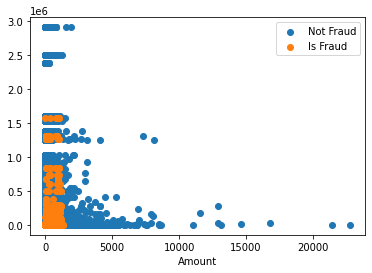

In [37]:
plt.scatter(OG_data_temp[OG_data_temp["is_fraud"] == 0]["amt"], OG_data_temp[OG_data_temp["is_fraud"] == 0]["city_pop"])
plt.scatter(OG_data_temp[OG_data_temp["is_fraud"] == 1]["amt"], OG_data_temp[OG_data_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Not Fraud", "Is Fraud"])
plt.xlabel("Amount")
plt.show

In [41]:
NG_data_temp = pd.concat([smote_x, smote_y], axis = 1)

<function matplotlib.pyplot.show(*args, **kw)>

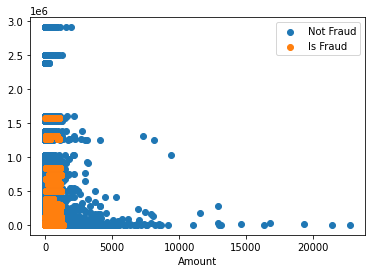

In [42]:
plt.scatter(NG_data_temp[NG_data_temp["is_fraud"] == 0]["amt"], NG_data_temp[NG_data_temp["is_fraud"] == 0]["city_pop"])
plt.scatter(NG_data_temp[NG_data_temp["is_fraud"] == 1]["amt"], NG_data_temp[NG_data_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Not Fraud", "Is Fraud"])
plt.xlabel("Amount")
plt.show